In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv", encoding = "latin1")
df.head()

C:\Users\91979\AppData\Local\Temp\ipykernel_3044\779582588.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv", encoding = "latin1")


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [3]:
print(df["date"].value_counts())

date
2015-03-19    253
2015-02-12    237
2015-02-19    236
2015-11-05    235
2015-11-11    234
             ... 
1988-04-26      1
1988-04-27      1
1987-05-08      1
1987-09-10      1
1987-06-11      1
Name: count, Length: 5067, dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [5]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [6]:
df["state"].value_counts()

state
Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     

In [8]:
df_delhi = df[df["state"] == "Delhi"].copy()
locations = df_delhi["location"].unique()
print("Available Locations in Delhi")
print(locations)
print("Top Rows of Delhi State")
print(df_delhi.head())

Available Locations in Delhi
['Delhi']
Top Rows of Delhi State
      stn_code sampling_date  state location                           agency  \
65861       60      9/1/1987  Delhi    Delhi  Central Pollution Control Board   
65862       59      9/2/1987  Delhi    Delhi  Central Pollution Control Board   
65863       58      9/3/1987  Delhi    Delhi  Central Pollution Control Board   
65864       57      9/3/1987  Delhi    Delhi  Central Pollution Control Board   
65865       56      9/2/1987  Delhi    Delhi  Central Pollution Control Board   

              type   so2   no2  rspm    spm location_monitoring_station  \
65861  Residential   8.6  16.2   NaN  323.0                         NaN   
65862  Residential   6.5   9.3   NaN  488.0                         NaN   
65863   Industrial  25.8  10.4   NaN  487.0                         NaN   
65864   Industrial   0.5   2.8   NaN  528.0                         NaN   
65865   Industrial   2.5  12.8   NaN  506.0                         NaN   


In [9]:
df_processed = df_delhi[["date", 'pm2_5']].copy()
df_processed['date'] = pd.to_datetime(df_processed['date'])
df_processed.set_index('date', inplace=True)
df_processed.sort_index(inplace = True)
df_processed['pm2_5'].fillna(method = 'ffill', inplace = True)
df_processed['pm2_5'].fillna(method = "bfill", inplace = True)
print("Processed Time Series for Delhi")
print(df_processed.head())


Processed Time Series for Delhi
            pm2_5
date             
1987-01-09  110.0
1987-01-10  110.0
1987-01-10  110.0
1987-01-11  110.0
1987-01-12  110.0


C:\Users\91979\AppData\Local\Temp\ipykernel_3044\2042861694.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['pm2_5'].fillna(method = 'ffill', inplace = True)
C:\Users\91979\AppData\Local\Temp\ipykernel_3044\2042861694.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_processed['pm2_5'].fillna(method = 'ffill', inplace = True)
C:\Users\91979\AppData\Local\Temp\ipykernel_3044\2042861694.py:6: FutureWarning: A value is t

In [10]:
print("Checking for any missing values")
print(df_processed.isnull().sum())

Checking for any missing values
pm2_5    0
dtype: int64


In [11]:
df_delhi.head()


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
65861,60,9/1/1987,Delhi,Delhi,Central Pollution Control Board,Residential,8.6,16.2,NaN,323.0,NaN,NaN,1987-01-09
65862,59,9/2/1987,Delhi,Delhi,Central Pollution Control Board,Residential,6.5,9.3,NaN,488.0,NaN,NaN,1987-02-09
65863,58,9/3/1987,Delhi,Delhi,Central Pollution Control Board,Industrial,25.8,10.4,NaN,487.0,NaN,NaN,1987-03-09
65864,57,9/3/1987,Delhi,Delhi,Central Pollution Control Board,Industrial,0.5,2.8,NaN,528.0,NaN,NaN,1987-03-09
65865,56,9/2/1987,Delhi,Delhi,Central Pollution Control Board,Industrial,2.5,12.8,NaN,506.0,NaN,NaN,1987-02-09


In [12]:
print(df_processed)

            pm2_5
date             
1987-01-09  110.0
1987-01-10  110.0
1987-01-10  110.0
1987-01-11  110.0
1987-01-12  110.0
...           ...
2015-12-30  116.0
2015-12-30  116.0
2015-12-31  116.0
2015-12-31  116.0
2015-12-31  116.0

[8551 rows x 1 columns]


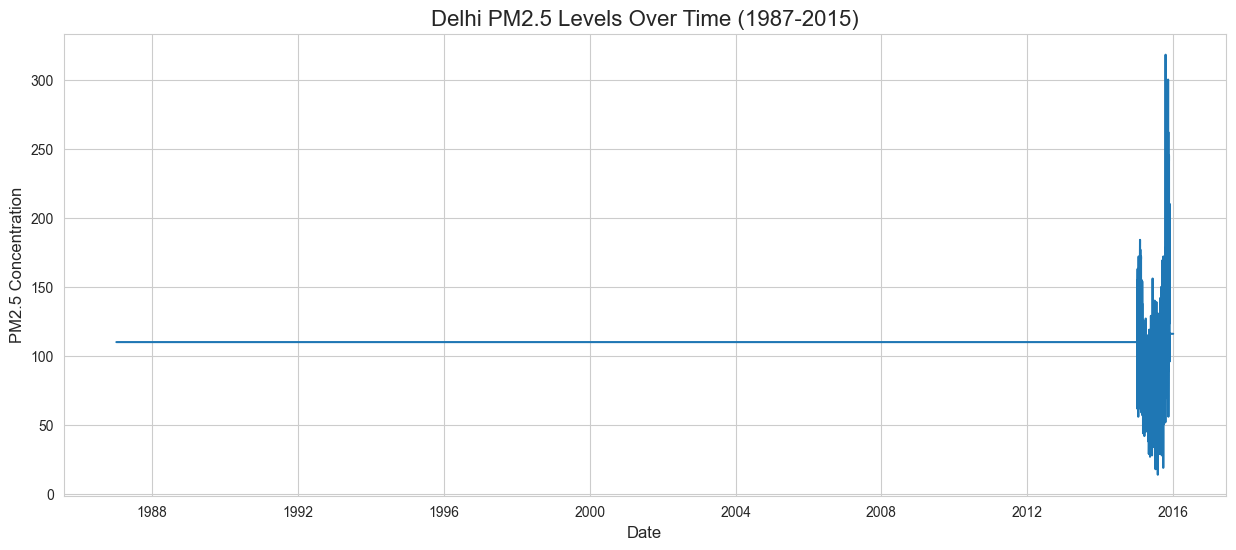

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

start_year = df_processed.index.min().year
end_year = df_processed.index.max().year

plt.figure(figsize=(15, 6))
plt.plot(df_processed.index, df_processed['pm2_5'])

plt.title(f'Delhi PM2.5 Levels Over Time ({start_year}-{end_year})', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('PM2.5 Concentration', fontsize=12)

plt.show()

C:\Users\91979\AppData\Local\Temp\ipykernel_3044\3672329852.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_processed.resample('M').mean()
C:\Users\91979\AppData\Local\Temp\ipykernel_3044\3672329852.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_monthly.fillna(method='ffill', inplace=True)


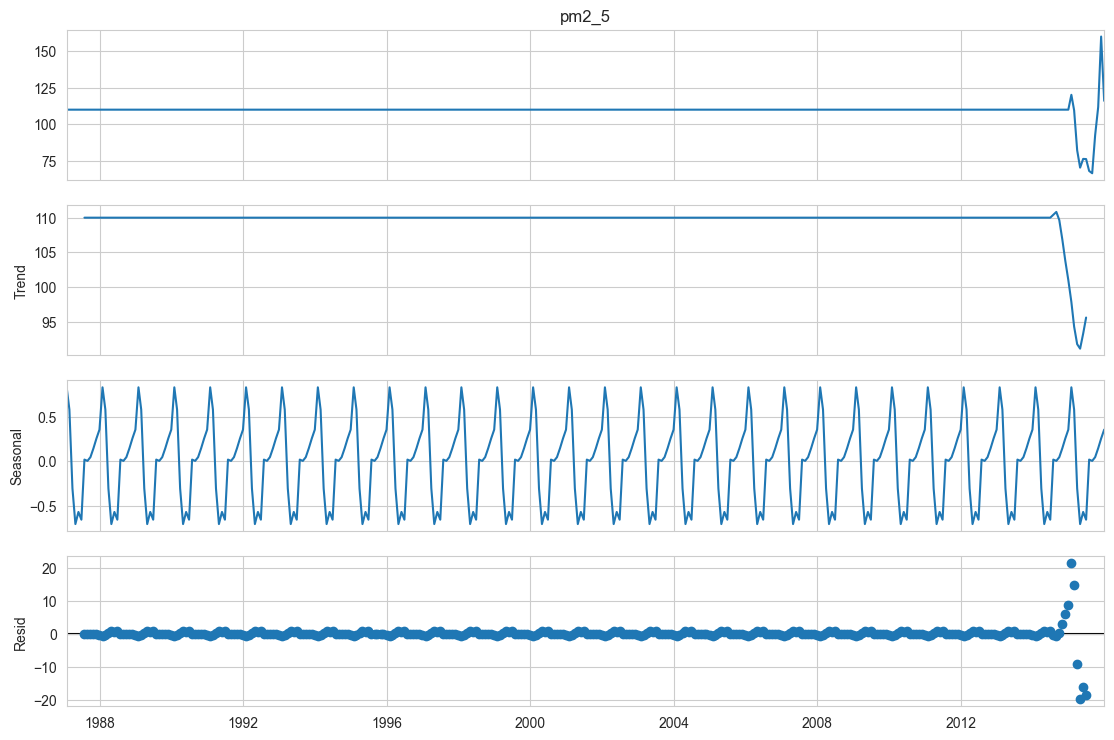

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose


# Resample the data to a monthly average
df_monthly = df_processed.resample('M').mean()

# --- THE FIX IS HERE ---
# Fill any NaN values that were created during resampling
df_monthly.fillna(method='ffill', inplace=True)

# Now, decompose the time series
result = seasonal_decompose(df_monthly['pm2_5'], model='additive')

# Plot the decomposed components
fig = result.plot()
fig.set_size_inches(12, 8)
plt.show()

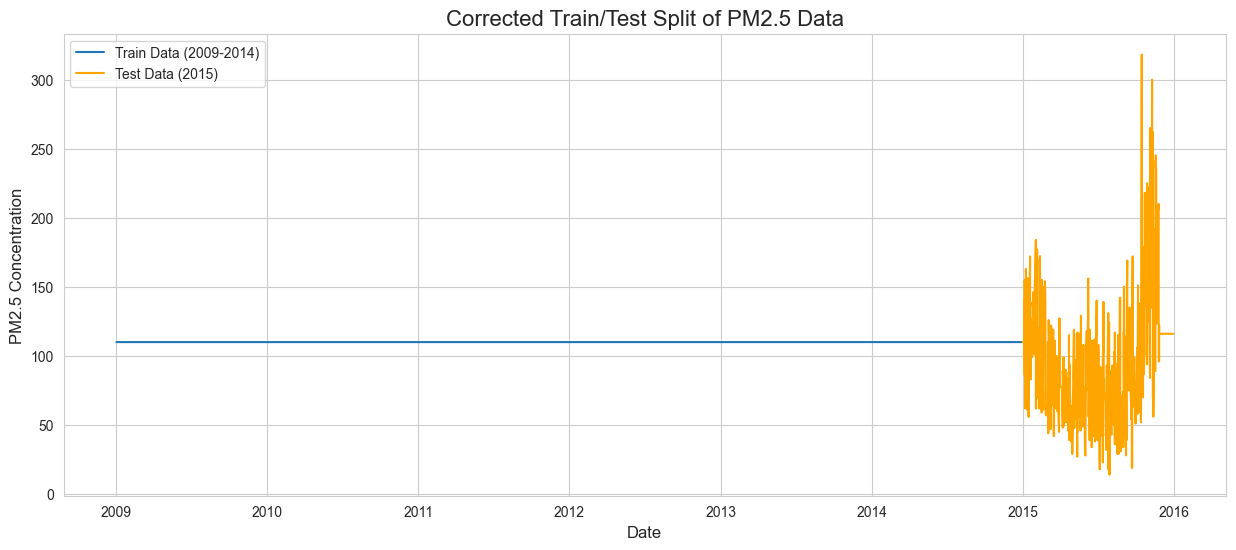

Corrected training data contains 2728 records.
Corrected testing data contains 744 records.


In [15]:
df_final = df_processed.loc[df_processed.index >= '2009-01-01'].copy()


# --- Now, redo the Train/Test split on this clean data ---
train_data = df_final.loc[df_final.index < '2015-01-01']
test_data = df_final.loc[df_final.index >= '2015-01-01']

# Plot the NEW split to visualize it
plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data['pm2_5'], label='Train Data (2009-2014)')
plt.plot(test_data.index, test_data['pm2_5'], label='Test Data (2015)', color='orange')

plt.title('Corrected Train/Test Split of PM2.5 Data', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('PM2.5 Concentration', fontsize=12)
plt.legend()
plt.show()

print(f"Corrected training data contains {len(train_data)} records.")
print(f"Corrected testing data contains {len(test_data)} records.")

In [16]:
df_1 = pd.read_csv("data_2016_2024.csv",parse_dates=['date'], index_col='date')
df_combined = pd.concat([df_final, df_1])
df_combined.sort_index(inplace = True)
print("Combined dataset created from 2009 to 2024")
print(f"Total records: {len(df_combined)}")

Combined dataset created from 2009 to 2024
Total records: 6760


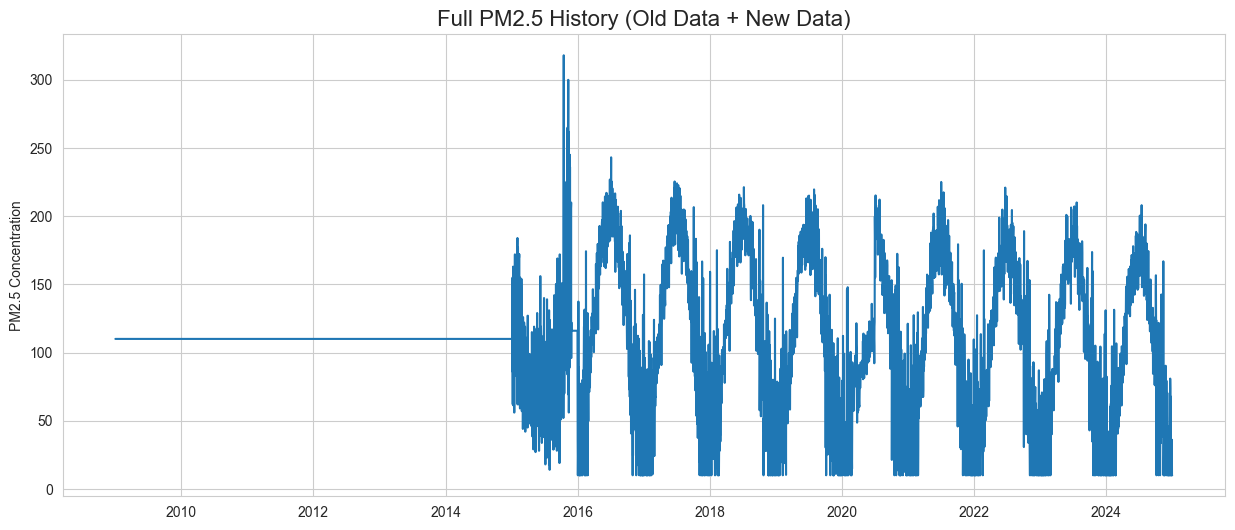

In [17]:
plt.figure(figsize=(15, 6))
plt.plot(df_combined.index, df_combined['pm2_5'])
plt.title('Full PM2.5 History (Old Data + New Data)', fontsize=16)
plt.ylabel('PM2.5 Concentration')
plt.show()

22:17:13 - cmdstanpy - INFO - Chain [1] start processing
22:17:18 - cmdstanpy - INFO - Chain [1] done processing


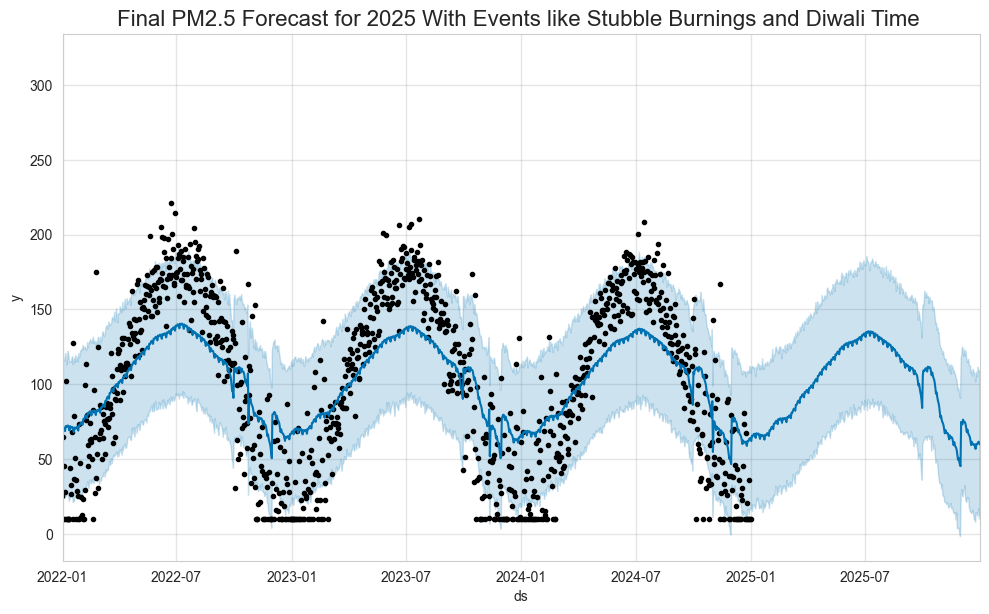

Prophet Model Trained Successfully with stubble burings and diwali effects.


In [19]:
from prophet import Prophet
prophet_data_full = df_combined.reset_index().rename(columns={'date': 'ds', 'pm2_5': 'y'})
#defining the special events
#1. Diwali
diwali_dates = pd.DataFrame({
  'holiday': 'Diwali',
  'ds': pd.to_datetime([
      '2009-10-17', '2010-11-05', '2011-10-26', '2012-11-13', '2013-11-03',
      '2014-10-23', '2015-11-11', '2016-10-30', '2017-10-19', '2018-11-07',
      '2019-10-27', '2020-11-14', '2021-11-04', '2022-10-24', '2023-11-12', '2024-11-01'
  ]),
  'lower_window': -1, 'upper_window': 2,
})
#2. Stubble Burning Features
def stubble_burning_season(ds):
    date = pd.to_datetime(ds)
    return (date.month == 10 or date.month == 11)
 
prophet_model_final = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False, holidays = diwali_dates)
prophet_model_final.add_seasonality(name = "stubble_burning",
                                    period = 365,
                                    fourier_order=5,
                                    condition_name="stubble_burning")
#Adding Stubble burning to the data before fitting it 
prophet_data_full["stubble_burning"] = prophet_data_full['ds'].apply(stubble_burning_season)
prophet_model_final.fit(prophet_data_full)

#Forecasting
#Create the future dates and add the stubble burning into it
future_dates_2025 = prophet_model_final.make_future_dataframe(periods=365)
future_dates_2025['stubble_burning'] = future_dates_2025['ds'].apply(stubble_burning_season)

#Make the predictions
forecast_2025 = prophet_model_final.predict(future_dates_2025)

#Plotting
fig = prophet_model_final.plot(forecast_2025)
# Zoom in on the last few years + the forecast period
ax = fig.gca()
ax.set_xlim(pd.to_datetime('2022-01-01'), pd.to_datetime('2025-12-31')) 
plt.title('Final PM2.5 Forecast for 2025 With Events like Stubble Burnings and Diwali Time ', fontsize=16)
plt.show()
print("Prophet Model Trained Successfully with stubble burings and diwali effects.")

In [20]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

y_pred = forecast_2025['yhat'][-len(test_data):]
y_true = test_data['pm2_5']

#Calculate the errors
mae = mean_squared_error(y_true,y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"Mean Squared Error is: {mae:.2f}")
print(f"Root Mean Squared Error is: {rmse:.2f}")

print(f"Average of PM2.5 value in the test set is: {y_true.mean():.2f}")

Mean Squared Error is: 2656.63
Root Mean Squared Error is: 51.54
Average of PM2.5 value in the test set is: 95.35


## Model Evaluation

In [21]:
from prophet.serialize import model_to_json
with open('prophet_model_v2.json', 'w') as fout:
    fout.write(model_to_json(prophet_model_final))

print("Prophet model saved successfully as prophet_model_v2.json")

Prophet model saved successfully as prophet_model_v2.json


In [22]:
from prophet.serialize import model_from_json
with open('prophet_model_v2.json', 'r') as fin:
    loaded_prophet_model = model_from_json(fin.read())
forecast = loaded_prophet_model.predict(future_dates_2025)

print("Prophet model loaded and used for forecasting.")

Prophet model loaded and used for forecasting.


## Implementing SARIMA Model

In [23]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX



# 1. Resample the DataFrame to a monthly frequency
df_monthly = df_combined.resample('ME').mean()
df_monthly.fillna(method='ffill', inplace=True)

# 2. Now, add the new event columns to the DataFrame
df_monthly['stubble_burning'] = np.where((df_monthly.index.month == 10) | (df_monthly.index.month == 11), 1, 0)

diwali_months = pd.to_datetime([
    '2009-10', '2010-11', '2011-10', '2012-11', '2013-11', '2014-10', '2015-11',
    '2016-10', '2017-10', '2018-11', '2019-10', '2020-11', '2021-11', '2022-10',
    '2023-11', '2024-11'
]).to_period('M')

df_monthly['diwali'] = np.where(df_monthly.index.to_period('M').isin(diwali_months), 1, 0)

print("Data with new event features:")
print(df_monthly.tail())





Data with new event features:
                 pm2_5  stubble_burning  diwali
date                                           
2024-08-31  149.277136                0       0
2024-09-30  111.339852                0       0
2024-10-31   69.004492                1       0
2024-11-30   55.124103                1       1
2024-12-31   28.804429                0       0


C:\Users\91979\AppData\Local\Temp\ipykernel_3044\3583226888.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_monthly.fillna(method='ffill', inplace=True)


In [24]:
#Splitting the target variable (Endog)
train_endog = df_monthly.loc[df_monthly.index.year < 2024]['pm2_5']
test_endog = df_monthly.loc[df_monthly.index.year == 2024]['pm2_5']

#Splitting the target variable (Exog)
train_exog = df_monthly.loc[df_monthly.index.year < 2024][['stubble_burning', 'diwali']]
test_exog = df_monthly.loc[df_monthly.index.year == 2024][['stubble_burning', 'diwali']]


# --- 2. Correct Model Training with 'exog' ---
print("Fitting the SARIMAX model on monthly data...")
sarimax_model = SARIMAX(train_endog,
                        exog=train_exog,  # <-- Change 1: Pass the event training data
                        order=(1, 1, 1),
                        seasonal_order=(1, 1, 1, 12)).fit(disp=False)

print("SARIMAX model fitted successfully.")

sarima_predictions = sarimax_model.forecast(steps=len(test_endog), 
                                            exog=test_exog) # <-- Change 2: Pass the event testing data

sarima_rmse = np.sqrt(mean_squared_error(test_endog, sarima_predictions))
print(f"\nSARIMAX Model RMSE: {sarima_rmse:.2f}")

Fitting the SARIMAX model on monthly data...
SARIMAX model fitted successfully.

SARIMAX Model RMSE: 5.31


## Implementing ETS Model

In [53]:
from statsmodels.tsa.api import ETSModel
print("\nFitting the ETS model on monthly data...")
# Let the model automatically find the best components
ets_model = ETSModel(train_data, seasonal_periods=12).fit()
print("ETS model fitted successfully.")

ets_predictions = ets_model.predict(start=test_data.index[0], end=test_data.index[-1])
ets_rmse = np.sqrt(mean_squared_error(test_data, ets_predictions))
print(f"\nETS Model RMSE: {ets_rmse:.2f}")



Fitting the ETS model on monthly data...
ETS model fitted successfully.

ETS Model RMSE: 52.36


## Visualization

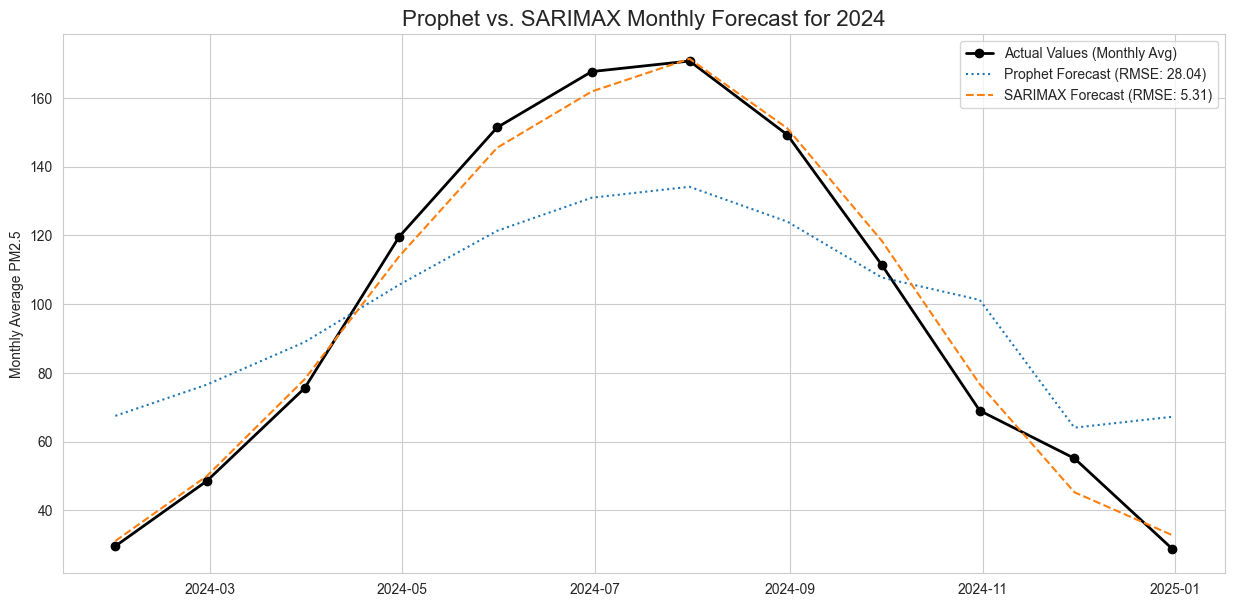

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from prophet.serialize import model_from_json

# --- 1. Prepare Data ---
# (Assuming 'df_monthly', 'df_combined' are available)
# (Assuming your enhanced Prophet model 'prophet_model_final_v2' is trained and loaded)
test_endog = df_monthly.loc[df_monthly.index.year == 2024]['pm2_5']

# --- 2. Get SARIMAX Predictions (with events) ---
train_endog = df_monthly.loc[df_monthly.index.year < 2024]['pm2_5']
train_exog = df_monthly.loc[df_monthly.index.year < 2024][['stubble_burning', 'diwali']]
test_exog = df_monthly.loc[df_monthly.index.year == 2024][['stubble_burning', 'diwali']]
sarimax_model = SARIMAX(train_endog, exog=train_exog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit(disp=False)
sarimax_preds = sarimax_model.forecast(steps=len(test_endog), exog=test_exog)
sarimax_rmse = np.sqrt(mean_squared_error(test_endog, sarimax_preds))

# --- 3. Get Prophet Predictions (with events) and Resample to Monthly ---
future = prophet_model_final.make_future_dataframe(periods=365)
future['stubble_burning'] = future['ds'].apply(stubble_burning_season)
forecast = prophet_model_final.predict(future)
prophet_daily_preds_2024 = forecast[forecast['ds'].dt.year == 2024].set_index('ds')['yhat']
prophet_monthly_preds_2024 = prophet_daily_preds_2024.resample('ME').mean()
prophet_monthly_rmse = np.sqrt(mean_squared_error(test_endog, prophet_monthly_preds_2024))

# --- 4. Plot the Direct Comparison ---
plt.figure(figsize=(15, 7))

# Plot Actual Data
plt.plot(test_endog.index, test_endog, label='Actual Values (Monthly Avg)', color='black', marker='o', linewidth=2)

# Plot Prophet Monthly Forecast
plt.plot(test_endog.index, prophet_monthly_preds_2024, label=f'Prophet Forecast (RMSE: {prophet_monthly_rmse:.2f})', linestyle=':')

# Plot SARIMAX Monthly Forecast
plt.plot(test_endog.index, sarimax_preds, label=f'SARIMAX Forecast (RMSE: {sarimax_rmse:.2f})', linestyle='--')

plt.title('Prophet vs. SARIMAX Monthly Forecast for 2024', fontsize=16)
plt.ylabel('Monthly Average PM2.5')
plt.legend()
plt.grid(True)
plt.show()

## Saving the Models

In [31]:
import pickle
sarimax_model.save('sarimax_model.pkl')
print("SARIMA model saved to 'sarimax")

SARIMA model saved to 'sarimax


In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAXResults
loaded_sarimax_model = SARIMAXResults.load('sarimax_model.pkl')
sarimax_forecast = loaded_sarimax_model.forecast(steps=len(test_endog), exog=test_exog)
print("SARIMAX model loaded and used for forecasting.")

SARIMAX model loaded and used for forecasting.


In [58]:
ets_model.save('ets_model.pkl')
print("ETS model saved to 'ets_model.pkl'")

ETS model saved to 'ets_model.pkl'


In [59]:
from statsmodels.tsa.exponential_smoothing.ets import ETSResults
loaded_ets_model = ETSResults.load('ets_model.pkl')
ets_forecast = loaded_ets_model.predict(start=test_data.index[0], end=test_data.index[-1])
print("ETS model loaded and used for forecasting.")

ETS model loaded and used for forecasting.
